<a href="https://colab.research.google.com/github/YeojinKim03/AI-study/blob/master/220808_AI_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 증강

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt


##파일 시스템에서 증강

In [ ]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/2022_WISET/raw/main/material/deep_learning/dogs_prepared.tar.gz
!ls -al 

--2022-08-08 01:11:20--  https://github.com/dhrim/2022_WISET/raw/main/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/dogs_prepared.tar.gz [following]
--2022-08-08 01:11:20--  https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   251MB/s    in 0.2s    

2022-08-08 01:11:20 (251 MB

In [ ]:
!apt-get update
!apt install tree #tree 설치

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [902 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

In [ ]:
!tree -d

.
└── sample_data

1 directory


In [ ]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

In [ ]:
!tree -d

.
├── dogs_prepared
│   ├── test
│   │   ├── n02085620-Chihuahua
│   │   ├── n02085782-Japanese_spaniel
│   │   ├── n02085936-Maltese_dog
│   │   ├── n02086079-Pekinese
│   │   ├── n02086240-Shih-Tzu
│   │   ├── n02086646-Blenheim_spaniel
│   │   ├── n02086910-papillon
│   │   ├── n02087046-toy_terrier
│   │   ├── n02087394-Rhodesian_ridgeback
│   │   └── n02088094-Afghan_hound
│   └── train
│       ├── n02085620-Chihuahua
│       ├── n02085782-Japanese_spaniel
│       ├── n02085936-Maltese_dog
│       ├── n02086079-Pekinese
│       ├── n02086240-Shih-Tzu
│       ├── n02086646-Blenheim_spaniel
│       ├── n02086910-papillon
│       ├── n02087046-toy_terrier
│       ├── n02087394-Rhodesian_ridgeback
│       └── n02088094-Afghan_hound
└── sample_data

24 directories


In [ ]:

import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

def my_preprocess_input(image): #함수 적용, 255로 나눠줌
  return image/255

BATCH_SIZE = 128

data_aug_generator = ImageDataGenerator( #generator
      rotation_range=10, #각도 최대 10도
      width_shift_range=0.1, #좌우로 10퍼센트만 이동
      height_shift_range=0.1,
      horizontal_flip=True, #좌우로 플립
      vertical_flip=False, #위아래 플립
      preprocessing_function=my_preprocess_input #normalization
)

iterator = data_aug_generator.flow_from_directory( #여기서 데이터를 보내줘
      "dogs_prepared/train", #출처
      target_size=(224,224), #리사이즈 해줘
      batch_size=BATCH_SIZE, #배치사이즈 설정
      class_mode='sparse' #01234 이렇게 카테고리
)


Found 1531 images belonging to 10 classes.


In [ ]:
#실제 데이터 받는 방법
batch_x, batch_y = next(iterator) #여기부분 이해안됨 #다음 데이터를 조회해서 x와 y를 뽑음
#예를 들어 파일 사이즈 1000개고 batch size 100개면 10번이 한 epoch이긴 하지만 어쨌든 무한대 데이터 증강할 수 있음
#증강은 보통 20배 하는 듯
#실행할 때마다 계속 데이터 꺼내짐

In [ ]:
print(batch_x.shape)
print(batch_y.shape)

(128, 224, 224, 3)
(128,)


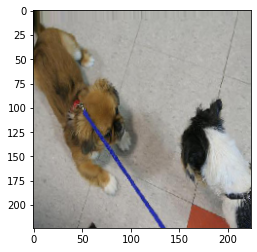

In [ ]:
#이미지 보여주는 코드
plt.imshow(batch_x[0])
plt.show()

In [ ]:
data_count = len(iterator.labels) 
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)

augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)

# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

data_count : 1531
WANTED_MULTIPLE_COUNT : 2
STEP_COUNT : 12
FETCH_COUNT : 24
(3062, 224, 224, 3)
(3062,)


In [ ]:
print(iterator.class_indices.keys()) #label 이름들을 얻을 수 있음

dict_keys(['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound'])


##로딩한 데이터 증강

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255
test_x = raw_test_x/255

# train_x = train_x.reshape((60000, 28, 28, 1)) # COMMENT OUT
# test_x = test_x.reshape((10000, 28, 28, 1)) # COMMENT OUT

train_y = raw_train_y
test_y = raw_test_y

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


9 truck


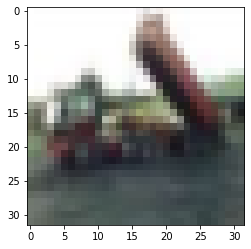

4 deer


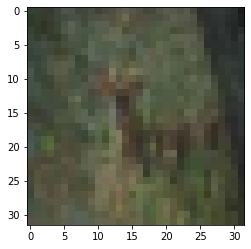

7 horse


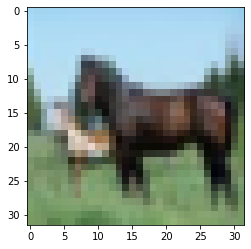

9 truck


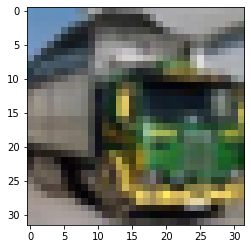

In [ ]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( #데이터 증강만의 기능 #작업자
    rotation_range=10, # 0 ~ 180
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False 
)

In [ ]:
BATCH_SIZE = 128
iterator = datagen.flow(train_x, train_y, batch_size=BATCH_SIZE) #flow는 실행 #데이터를 다운받았으면 flow로 불러옴 

datage.flow() 의 반환값은 python의 iteratordlek
<br>
next(iterator)를 호출하여 다음 아이템을 받을 수 있다

In [ ]:
item = next(iterator) 
augmented_x, augmented_y = item
print(augmented_x.shape)
print(augmented_y.shape)

(128, 32, 32, 3)
(128, 1)

In [ ]:
data_count = len(train_x)
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)


augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)
  # print(len(augmented_x_list))
# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

In [ ]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()

#Vgg-16이라는 모델로 전이학습

##데이터 준비
인식에 사용할 데이터 다운로드

In [ ]:
!rm -rf imagenet
!mkdir imagenet

# 버섯
!wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
!wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
!wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg
  

--2022-08-08 01:39:36--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 52.84.159.78, 2600:9000:20be:c000:0:5a51:64c9:c681, 2600:9000:20be:4800:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|52.84.159.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2022-08-08 01:39:36--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|52.84.159.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  59.96K  --.-KB/s    in 0.006s  

2022-08-08 01:39:37 (9.42 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61397]

--2022-08-08 01:39:37--  http://farm3.static.flickr.com/24

##예측 위한 함수 선언

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def predict_vgg16(model, filename) :

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224)) #이미지 로딩, 리사이즈 함
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image) #image를 numpy로 변환함, 가로 세로 224개
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)
  
  # 화면에 이미지 보여주기
  plt.imshow(image.astype(int)) #화면에 이미지 보여줌
  plt.show()

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정 #이미지를 여러개로 한번에 처리함
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 세로
  # 세번째 224 : 가로
  # 네번째 3 : R, G, B 채널 3개
  image = image.reshape((1, 224, 224, 3)) #차원만 늘린 것임, vgg는 batch로 처리해야하니까

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다. #얘네가 이렇게 함
  image = vgg16.preprocess_input(image) #이미지 전처리를 먼저 해줌
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image) #1000개의 카테고리에 해당되는 출력층의 노드의 값, 일자로
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat) #가장 높은 것이 무엇인지, 정리해주는 거
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0] # 첫번째 데이터의 ([0]), 가장 confidence(신뢰도)가 높은 것 ([0])
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))    

   

##분류 실행

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

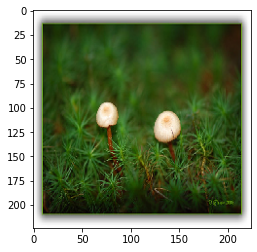

acorn (33.70%)


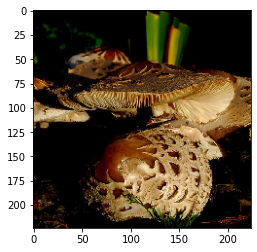

mushroom (71.41%)


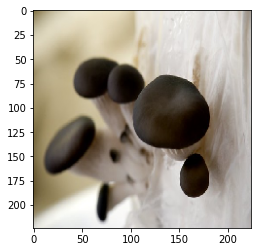

birdhouse (23.68%)


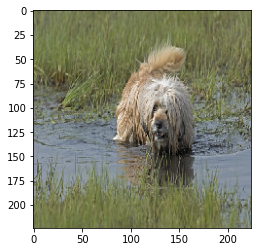

Tibetan_terrier (80.98%)


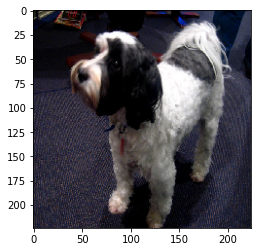

Tibetan_terrier (86.20%)


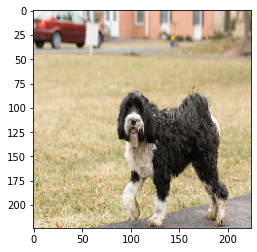

standard_poodle (23.26%)


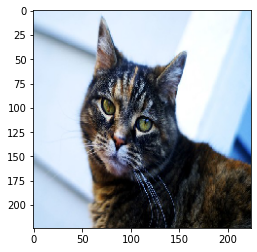

tabby (56.46%)


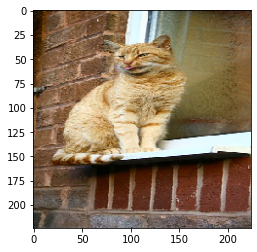

tiger_cat (39.90%)


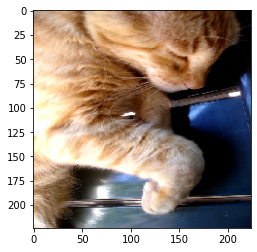

tiger_cat (18.95%)


In [ ]:
from tensorflow.keras.applications import vgg16 #모델들이 저장되어 있음

# VGG16 모델 불러오기
model = vgg16.VGG16() #모델 이 코드로 간단하게 불러와 로딩까지 함

# 모델의 모양을 보여준다.
model.summary()

# 테스트 할 이미지 파일들 #9개의 파일에서 iteration 돌면서 모델 학습 실행
files = [
      'imagenet/mushroom1.jpg',
      'imagenet/mushroom2.jpg',
      'imagenet/mushroom3.jpg',
      'imagenet/dog1.jpg',
      'imagenet/dog2.jpg',
      'imagenet/dog3.jpg',
      'imagenet/cat1.jpg',
      'imagenet/cat2.jpg',
      'imagenet/cat3.jpg',
    ]

# 분류 실행
for file in files :
  predict_vgg16(model, file)  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


In [ ]:
#VGG 만들어보기

model=keras.Sequential()
model.add(Input(224,224,3))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), padding="same"))
model.add(Conv2D(128,(3,3), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Conv2D(256,(3,3), padding="same"))
model.add(Conv2D(256,(3,3), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Conv2D(512,(3,3), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Conv2D(512,(3,3), padding="same"))
model.add(Conv2D(512,(3,3), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(1000, activation="softmax"))

TypeError: ignored

#커스텀 데이터 사용한 것

In [ ]:
#커스텀 데이터 다운로드
!rm -rf dogs.tar.gz
!wget https://github.com/dhrim/2022_WISET/raw/main/material/deep_learning/dogs.tar.gz
!ls -al  

--2022-08-08 02:29:14--  https://github.com/dhrim/2022_WISET/raw/main/material/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/dogs.tar.gz [following]
--2022-08-08 02:29:14--  https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz         100%[===================>]  59.97M   172MB/s    in 0.3s    

2022-08-08 02:29:15 (172 MB/s) - ‘dogs.tar.gz’ saved [62885106/6288

In [ ]:
!rm -rf dogs
!tar xvfz dogs.tar.gz
!ls -al dogs

dogs/
dogs/n02085620-Chihuahua/
dogs/n02085782-Japanese_spaniel/
dogs/n02085936-Maltese_dog/
dogs/n02086079-Pekinese/
dogs/n02086240-Shih-Tzu/
dogs/n02086646-Blenheim_spaniel/
dogs/n02086910-papillon/
dogs/n02087046-toy_terrier/
dogs/n02087394-Rhodesian_ridgeback/
dogs/n02088094-Afghan_hound/
dogs/n02088094-Afghan_hound/n02088094_1003.jpg
dogs/n02088094-Afghan_hound/n02088094_1007.jpg
dogs/n02088094-Afghan_hound/n02088094_1023.jpg
dogs/n02088094-Afghan_hound/n02088094_10263.jpg
dogs/n02088094-Afghan_hound/n02088094_10715.jpg
dogs/n02088094-Afghan_hound/n02088094_10822.jpg
dogs/n02088094-Afghan_hound/n02088094_10832.jpg
dogs/n02088094-Afghan_hound/n02088094_10982.jpg
dogs/n02088094-Afghan_hound/n02088094_11006.jpg
dogs/n02088094-Afghan_hound/n02088094_11172.jpg
dogs/n02088094-Afghan_hound/n02088094_11182.jpg
dogs/n02088094-Afghan_hound/n02088094_1126.jpg
dogs/n02088094-Afghan_hound/n02088094_1128.jpg
dogs/n02088094-Afghan_hound/n02088094_11432.jpg
dogs/n02088094-Afghan_hound/n02088094_1

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16

In [ ]:
(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(custom_labels)  

In [ ]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  combined = list(zip(file_names, category_names))
  random.shuffle(combined)
  file_names, category_names = zip(*combined)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels



In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.applications import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #잘 모르겠음, Include top 까먹음 다시
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = keras.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델
model.summary()

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['acc'])

# 모델 학습
hist = model.fit(train_x, train_y, epochs=200, batch_size=64, shuffle=True, validation_split=0.1)

#ResNet 사용한 것을 EfficienctNEt밑에 있는 EfficientNetB2를 사용하는 것으로 바꿔보라

In [ ]:
#tensorflow.keras.applications 구글링해서 찾기

In [ ]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/2022_WISET/raw/main/material/deep_learning/dogs_prepared.tar.gz
!ls -al

--2022-08-08 02:35:34--  https://github.com/dhrim/2022_WISET/raw/main/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/dogs_prepared.tar.gz [following]
--2022-08-08 02:35:34--  https://raw.githubusercontent.com/dhrim/2022_WISET/main/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   163MB/s    in 0.4s    

2022-08-08 02:35:35 (163 MB/s) 

In [ ]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import efficientnet 
from tensorflow.keras.applications import EfficientNetB2


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=efficientnet.preprocess_input
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=efficientnet.preprocess_input
).flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


history=model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(test_data_generator)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 198s 8s/step - loss: 12.7059 - acc: 0.7433 - val_loss: 3.5732 - val_acc: 0.8969
Epoch 2/10
24/24 [==============================] - 176s 7s/step - loss: 3.4902 - acc: 0.8681 - val_loss: 2.1013 - val_acc: 0.9175
Epoch 3/10
24/24 [==============================] - 177s 7s/step - loss: 2.4725 - acc: 0.9007 - val_loss: 1.4811 - val_acc: 0.9433
Epoch 4/10
24/24 [==============================] - 180s 7s/step - loss: 2.5978 - acc: 0.9033 - val_loss: 1.9871 - val_acc: 0.9253
Epoch 5/10
24/24 [==============================] - 179s 7s/step - loss: 1.7202 - acc: 0.9249 - val_loss: 3.1533 - val_acc: 0.8814
Epoch 6/10
24/24 [==============================] - 180s 8s/step - loss: 2.0205 - acc: 0.9086 - val_loss: 2.4402 - val_acc: 0.9175
Epoch 7/10
24/24 [==============================] - 184s 8s/step - loss: 1.7138 - acc: 0.9236 - val_loss: 2.0026 - val_acc: 0.92

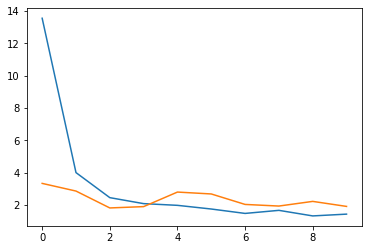

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

#영상 데이터 예측 by 전이학습 template

In [ ]:
#카테고리
model.add(Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["acc"])

#회귀,예측
model.add(Dense(1))
model.compile(loss='Mse', optimizer="Adam", metrics=["mae"]) 

##데이터 준비

In [1]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/cat_face_keypoint.zip

--2022-08-08 03:55:55--  https://github.com/dhrim/deep_learning_data/raw/master/cat_face_keypoint.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/cat_face_keypoint.zip [following]
--2022-08-08 03:55:55--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/cat_face_keypoint.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81178786 (77M) [application/zip]
Saving to: ‘cat_face_keypoint.zip’

cat_face_keypoint.z 100%[===================>]  77.42M   363MB/s    in 0.2s    

2022-08-08 03:55:57 (363 MB/s) - ‘cat_face_keypoint.zip’ saved [8117878

In [2]:
!unzip cat_face_keypoint.zip

Archive:  cat_face_keypoint.zip
  inflating: cat_image_and_keypoint.npy  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/crawford/cat-dataset 의
고양이 영상 파일과 레이블링 데이터를 읽고 numpy 파일로 저장해 두었다. <br>

In [9]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True) #numpy 불러옴
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

template_image_data_transfer_learning_regression.ipynb 여기서 다시 혼자 실습 계속

#Autoencoding
Auto=Self (나 자신을 출력으로 하는 것)
<br>
노이즈인것은 제거되고 깔끔하게 남음

copy from https://blog.naver.com/ckdgus1433/221443838135

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

##데이터 로딩

In [11]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


##Normalization

In [12]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.


##Flattening

In [13]:
train_x = np.reshape(train_x, (len(train_x), 784))
test_x = np.reshape(test_x, (len(test_x), 784))

##모델 정의와 학습 진행

In [14]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy') #각 픽셀에 대해 0인지 1인지


# 모형 학습
model.fit(train_x, train_x, epochs=100, batch_size=256)


Epoch 1/100
235/235 [==============================] - 4s 3ms/step - loss: 0.2487
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1531
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1307
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1211
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1152
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1103
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1066
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1038
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1019
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1003
Epoch 11/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0988
Epoch 12/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0974
Epoch 13/100


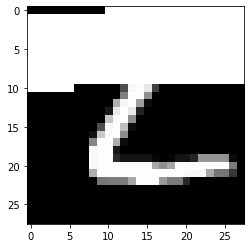

In [27]:
test_x[1,20]=1.0
plt.imshow(test_x[1].reshape(28,28), cmap='gray')
plt.show()

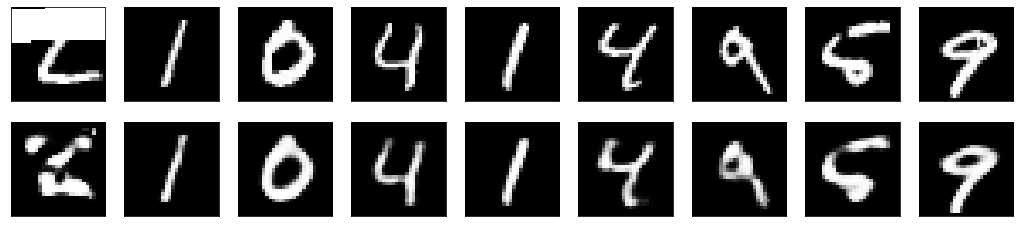

In [28]:
reconstruted = model.predict(test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # 출력된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reconstruted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#디노이징 autoencoder
노이즈 많은 것을 Input으로 넣고 깨끗한 걸 Output으로 학습시키면 디노이징이 됨

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

##데이터 로딩

In [30]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

##Normalization

In [31]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

##Flattening

In [34]:
train_x = np.reshape(train_x, (len(train_x), 784)) #train_x를 ( , )로 바꾸는 것
test_x = np.reshape(test_x, (len(test_x), 784))

##노이즈 추가

In [33]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000) 

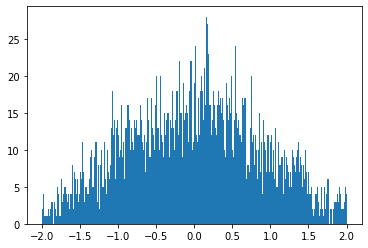

In [36]:
plt.hist(noise, bins=1000, range=(-2., 2.)) #bins 잘모르겠음
plt.show()

In [37]:
# 원본데이터에 Noise 추가
noise_factor = 0.5 
train_x_noisy = train_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape) 
test_x_noisy = test_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape) 

# 최대가 1, 최소가 0이 되도록 
train_x_noisy = np.clip(train_x_noisy, 0., 1.)
test_x_noisy = np.clip(test_x_noisy, 0., 1.)

##노이즈 추가된 영상 보기

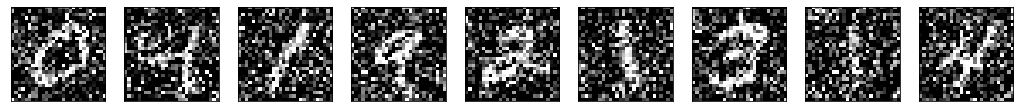

In [38]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##실시간 코드 실행 Loss

In [44]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])


#plot_losses = PlotLosses()
#history= model.fit(train_x_noisy, train_x, epochs=100, batch_size=256, validation_split=0.1, shuffle=True,callbacks=[plot_losses])
#이 두가지 코드 모델에 투입, callbacks[plot_losses] 추가해야

##모델 정의와 학습 실행

In [47]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
plot_losses = PlotLosses()
history= model.fit(train_x_noisy[:600], train_x[:600], epochs=1000, batch_size=256, validation_split=0.1, shuffle=True,callbacks=[plot_losses])

#600개만 사용할 때 [:600]


KeyboardInterrupt: ignored

##결과 확인

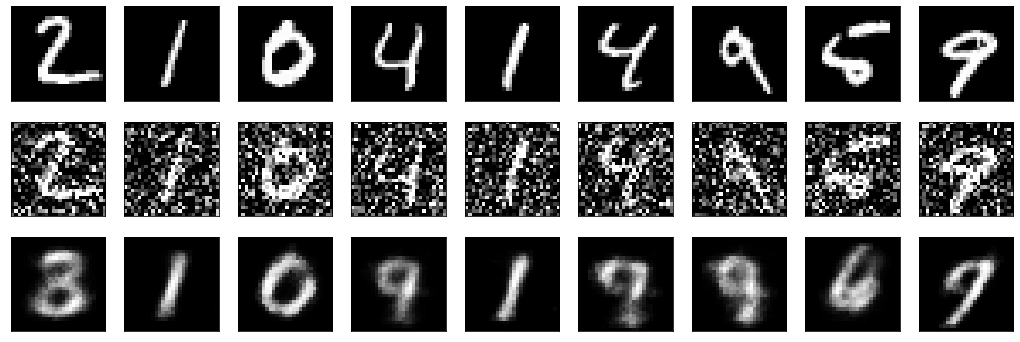

In [46]:
decoded_imgs = model.predict(test_x_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i) #세로세개 가로n개 i번째
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n) #세로세개 가로n개 i+n번째
    plt.imshow(test_x_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n) #세로세개 가로n개 i+2n번째
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#Matplot lib 공부

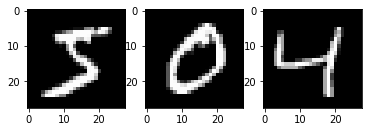

In [48]:
#한번에 그릴 때

plt.subplot(1,3,1) #세로한칸 가로세칸의 첫번째 항목
plt.imshow(train_x[0].reshape(28,28))

plt.subplot(1,3,2) #세로한칸 가로세칸의 두번쩨 항목
plt.imshow(train_x[1].reshape(28,28))

plt.subplot(1,3,3) #세로한칸 가로세칸의 세번쩨 항목
plt.imshow(train_x[2].reshape(28,28))


#Super resolution
해상도 줄인 것을 입력, 원본을 출력으로
<br>
해상도를 나아지게 하는 모델이 됨

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [50]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

In [51]:
# 데이터 정규화 및 Reshape
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

In [52]:
def shrink(data, rows, cols):
    return data.reshape(data.shape[0], rows, int(data.shape[1]/rows), cols, int(data.shape[2]/cols)).sum(axis=2).sum(axis=3)

reduced_train_x = shrink(train_x, 14, 14)
reduced_test_x = shrink(test_x, 14, 14)
print(reduced_train_x.shape)
print(reduced_test_x.shape)


(60000, 14, 14)
(10000, 14, 14)


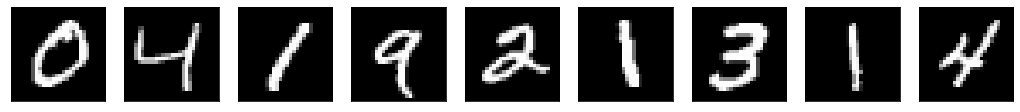

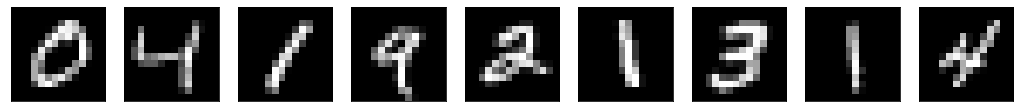

In [53]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(train_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 해상도 낮아진 이미지 확인
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(reduced_train_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [54]:
reduced_train_x = reduced_train_x.reshape(reduced_train_x.shape[0], 14*14)
reduced_test_x = reduced_test_x.reshape(reduced_test_x.shape[0], 14*14)
train_x = train_x.reshape(train_x.shape[0], 28*28)
test_x = test_x.reshape(test_x.shape[0], 28*28)

In [55]:
# 모델 정의
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14*14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(reduced_train_x, train_x, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0616 - val_loss: 0.0369
Epoch 2/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0301 - val_loss: 0.0250
Epoch 3/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0229 - val_loss: 0.0211
Epoch 4/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0201 - val_loss: 0.0190
Epoch 5/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0184 - val_loss: 0.0175
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0170 - val_loss: 0.0163
Epoch 7/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0159 - val_loss: 0.0154
Epoch 8/50
211/211 [==============================] - 1s 4ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 9/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0143 - val_loss: 0.0141
Epoch 10/50
211/211 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0135

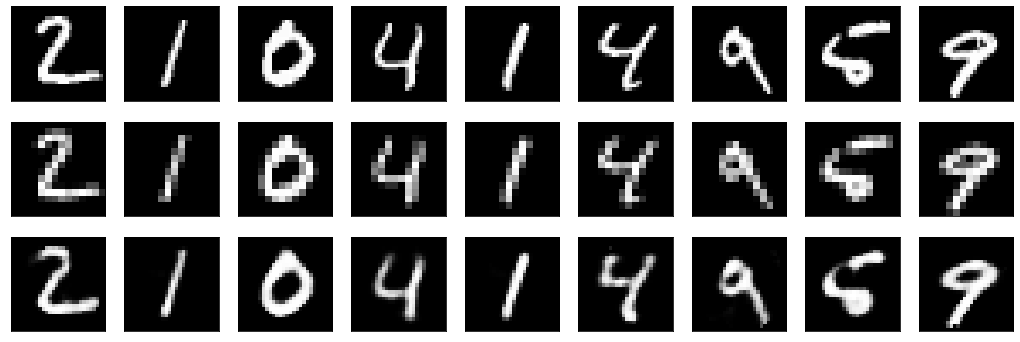

In [56]:
# 결과 확인
super_resolutioned = model.predict(reduced_test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reduced
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reduced_test_x[i].reshape(14,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display super resolution
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(super_resolutioned[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#Anomality detection
이상한 부분 유무에 대해서 detection 해줌

##fashion MNIST

###데이터 준비

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


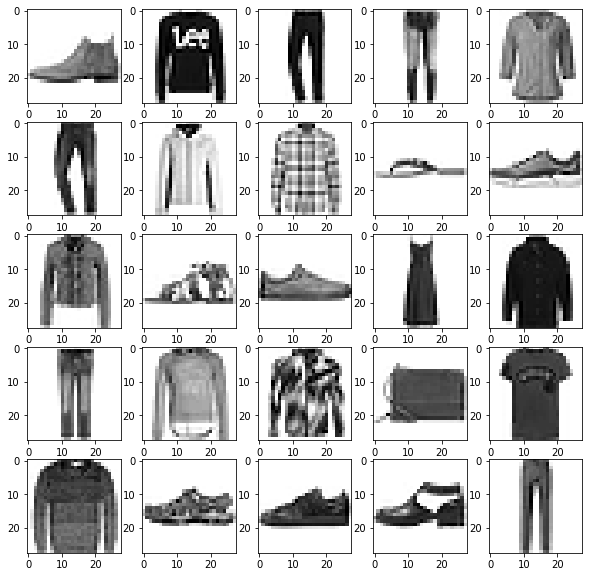

In [60]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) #가로 세로 5개인 subplot
    plt.imshow(test_x[i], cmap="binary")

plt.show()

###Test 데이터 생성

In [61]:
# load_data()로 받은 것은 read only이다 카피해서 write가능하게 한다.
test_x = test_x.copy()
test_y = np.zeros_like(test_y)

In [62]:
def draw_scar(image, size=2): #낙서 그리는 함수
    x = np.random.randint(0+size, 27-size)
    y = np.random.randint(0+size, 27-size)
    image[y-size:y+size+1,x] = 255 #십자형으로 낙서하게 됨
    image[y,x-size:x+size+1] = 255

# 반절을 낙서를 그린다.
for i in range(int(len(test_x)/2)):    
    draw_scar(test_x[i], size=1)
    test_y[i] = 1

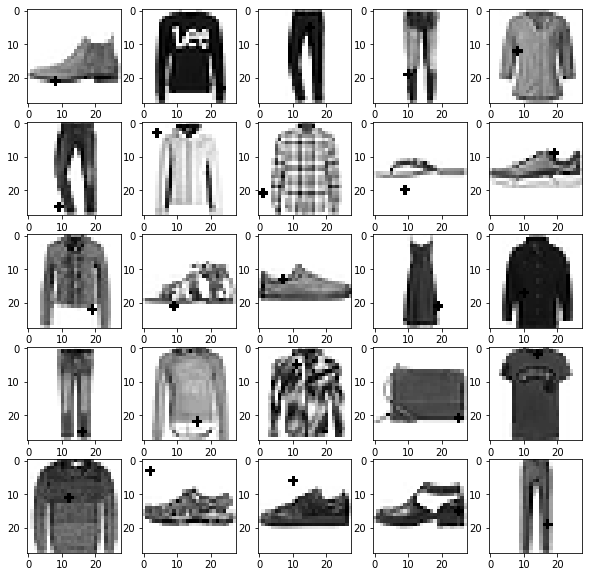

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_x[i], cmap="binary")

plt.show()

###Normalize

In [64]:
train_x = train_x / 255.
test_x = test_x / 255.

train_x = np.reshape(train_x, (-1, 28, 28, 1))
test_x = np.reshape(test_x, (-1, 28, 28, 1))

###모델 학습

In [68]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

model = Sequential()

model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Dense(2)) #bottle neck
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))



model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=["mape"])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  
hist = model.fit(train_x, train_x, epochs=1000, batch_size=1024, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/1000
53/53 [==============================] - 16s 90ms/step - loss: 0.4821 - mape: 101019328.0000 - val_loss: 0.3684 - val_mape: 50651184.0000
Epoch 2/1000
53/53 [==============================] - 4s 79ms/step - loss: 0.3332 - mape: 24857282.0000 - val_loss: 0.3884 - val_mape: 7698778.5000
Epoch 3/1000
53/53 [==============================] - 4s 82ms/step - loss: 0.3160 - mape: 18268116.0000 - val_loss: 0.3293 - val_mape: 31304656.0000
Epoch 4/1000
53/53 [==============================] - 4s 81ms/step - loss: 0.3034 - mape: 14662567.0000 - val_loss: 0.3000 - val_mape: 8300401.0000
Epoch 5/1000
53/53 [==============================] - 4s 79ms/step - loss: 0.2951 - mape: 11891682.0000 - val_loss: 0.2953 - val_mape: 15132594.0000
Epoch 6/1000
53/53 [==============================] - 4s 79ms/step - loss: 0.2895 - mape: 10343485.0000 - val_loss: 0.2908 - val_mape: 6547571.5000
Epoch 7/1000
53/53 [==============================] - 4s 79ms/step - loss: 0.2853 - mape: 9118090.0000 - va

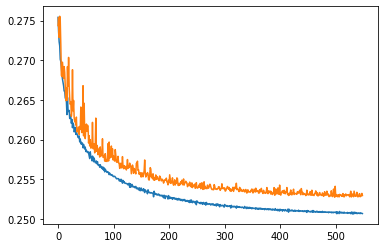

In [69]:
plt.plot(hist.history['loss'][10:])
plt.plot(hist.history['val_loss'][10:])
plt.show()

###Threshold 구하기

In [70]:
reconstructed = model.predict(train_x)

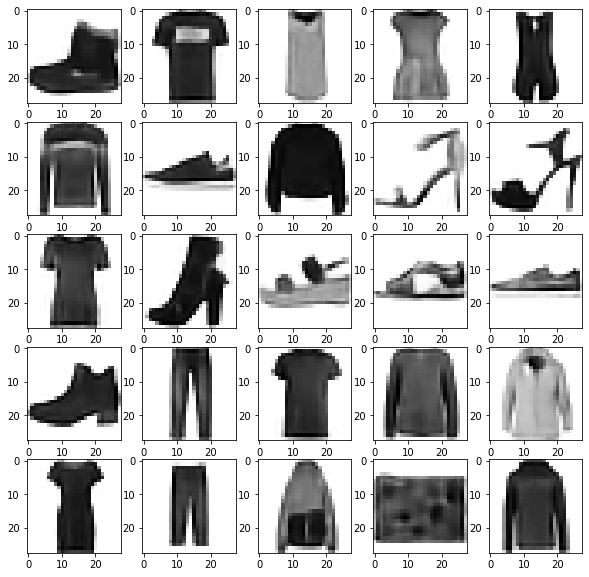

In [71]:
plt.figure(figsize=(10,10)) 
for i in range(25): #subplot 만들기
    plt.subplot(5,5,i+1)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary") #흑백

plt.show()

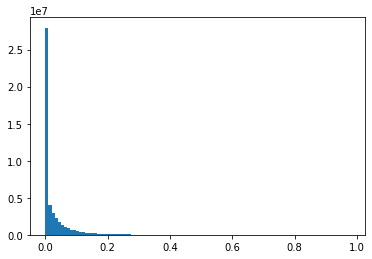

In [73]:
diff = np.abs(reconstructed - train_x) #차이 
plt.hist(diff.flatten(), bins=100) #flatten 함
plt.show()

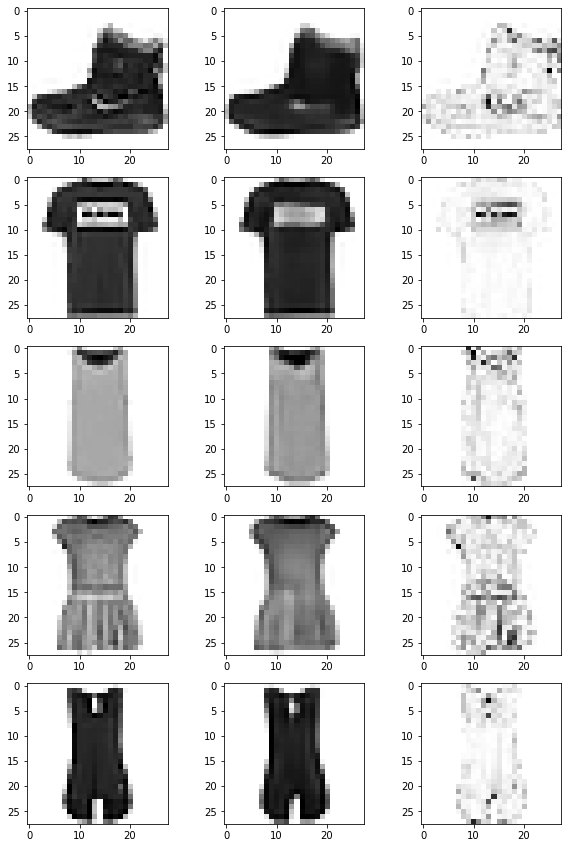

In [74]:
plt.figure(figsize=(10,15))
for i in range(5):
    plt.subplot(5,3,i*3+1)
    plt.imshow(train_x[i].reshape((28,28)), cmap="binary") #train
    plt.subplot(5,3,i*3+2)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary") #reconstruct
    plt.subplot(5,3,i*3+3)
    plt.imshow(diff[i].reshape((28,28)), cmap="binary") #difference

plt.show()

In [76]:
sorted_diff = np.sort(diff.flatten())
threshold_index = int(len(sorted_diff)*0.999) #99.9%까지의 값이 경계로 함
threshold = sorted_diff[threshold_index]

print(threshold)

0.47133199841368434


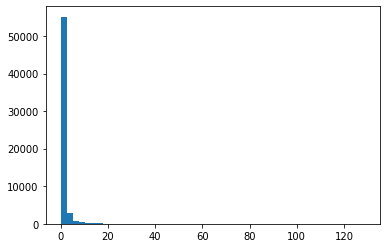

In [77]:
lage_diff_count = (diff>threshold).sum(axis=(1,2,3)) #3차원데이터가 그냥 숫자로 output이 나오고 싶을 때 axis 1,2,3
plt.hist(lage_diff_count, bins=50)
plt.show()

###탐지 실행

In [79]:
reconstructed = model.predict(test_x)

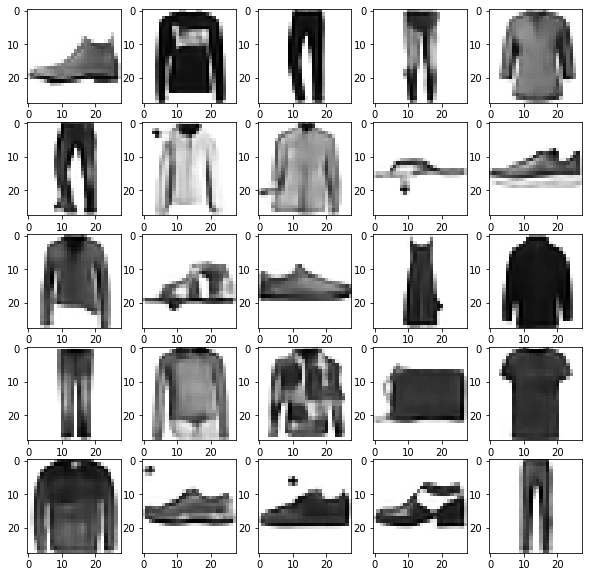

In [80]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")

plt.show()

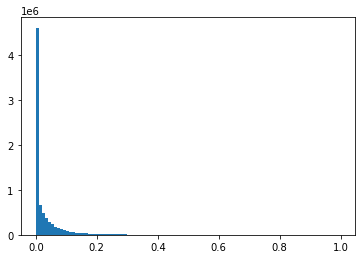

In [81]:
diff = np.abs(reconstructed - test_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

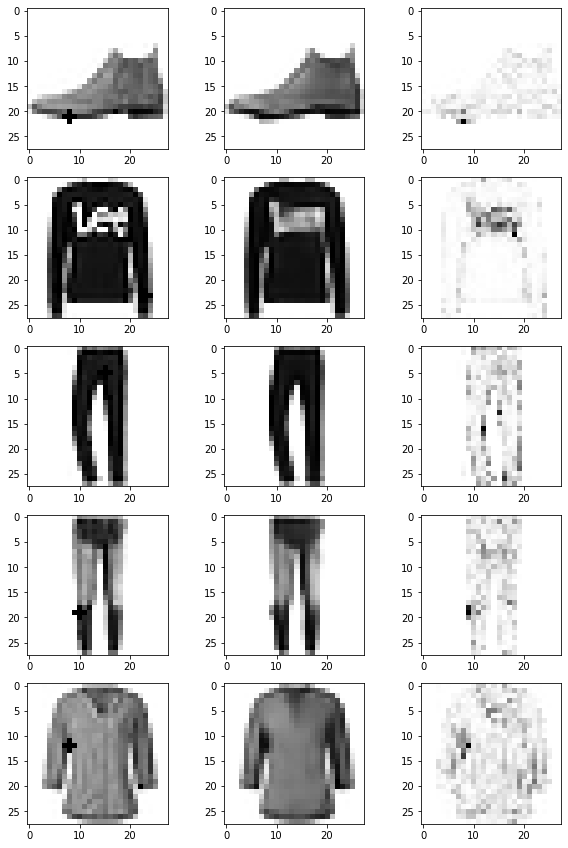

In [82]:
plt.figure(figsize=(10,15))
for i in range(5):
    plt.subplot(5,3,i*3+1)
    plt.imshow(test_x[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+2)
    plt.imshow(reconstructed[i].reshape((28,28)), cmap="binary")
    plt.subplot(5,3,i*3+3)
    plt.imshow(diff[i].reshape((28,28)), cmap="binary")

plt.show()

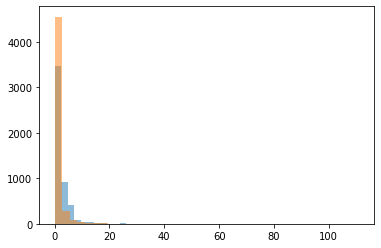

In [83]:
lage_diff_count = (diff>threshold).sum(axis=(1,2,3))

half_index = int(len(test_x)*0.5)
plt.hist(lage_diff_count[:half_index], bins=40, alpha=0.5)
plt.hist(lage_diff_count[half_index:], bins=40, alpha=0.5)
plt.show()



In [84]:
predicted = (lage_diff_count>0).astype(np.int16)

n = len(test_x)
accuracy = (predicted == test_y).sum() / n

print("accuracy=", accuracy)

accuracy= 0.6994
